# PreProcessing Data

Loading the data: It loads test and training datasets from CSV files.

Removing missing values: It replaces missing values (denoted as '-') with NaN and then removes any rows containing NaN values in both training and test data.
    
Handling categorical mismatches: It ensures that only the categories present in both the training and test datasets are kept. This addresses the issue where the categorical values in the training data may not exactly match those in the test data.

In [1]:
import pandas as pd
import numpy as np 

#Load data from the provided csv's
test_data = pd.read_csv('cyber-data/UNSW_NB15_testing-set.csv')
train_data = pd.read_csv('cyber-data/UNSW_NB15_training-set.csv')

#Drop attack category
test_data.drop('attack_cat', axis=1, inplace=True)
train_data.drop('attack_cat', axis=1, inplace=True)

#This combines the data in order to make sure the column names are the same, and then it gets the list of columns to iterate over
combined_data = pd.concat([train_data, test_data])
cols = list(combined_data)

#This would get rid of all the empty values by replacing them with nulls, then dropping them using np.nan. However we decided to not treat the dashes as nulls because almost all of the data has them
# for col in cols:
#     train_data[col].replace('-', np.nan, inplace=True)
#     train_data.dropna(subset=[col], inplace=True)
#     test_data[col].replace('-', np.nan, inplace=True)
#     test_data.dropna(subset=[col], inplace=True)

# #This iterates over all the columns and only saves the categorical values that are in both datasets
for col in cols:
    train_data = train_data[train_data[col].isin(test_data[col])]
    test_data = test_data[test_data[col].isin(train_data[col])]

display(train_data)
display(test_data)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.00130,...,1,1,4,0,0,0,2,1,0,0
36,37,0.000015,udp,-,INT,2,0,168,0,66666.66835,...,1,1,3,0,0,0,1,3,0,0
42,43,0.000008,udp,-,INT,2,0,168,0,125000.00030,...,1,1,1,0,0,0,1,2,0,0
49,50,0.000010,udp,-,INT,2,0,168,0,100000.00250,...,1,1,2,0,0,0,1,3,0,0
54,55,0.000024,udp,-,INT,2,0,168,0,41666.66519,...,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82325,82326,0.000009,any,-,INT,2,0,200,0,111111.10720,...,3,3,13,0,0,0,5,9,0,1
82326,82327,0.000005,unas,-,INT,2,0,200,0,200000.00510,...,3,3,14,0,0,0,3,11,0,1
82327,82328,0.000003,cftp,-,INT,2,0,200,0,333333.32150,...,3,3,13,0,0,0,5,9,0,1
82329,82330,0.000009,udp,-,INT,2,0,168,0,111111.10720,...,1,1,20,0,0,0,20,1,0,1


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,2,1,3,0,0,0,2,3,0,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
10,11,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
11,12,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82326,82327,0.000009,udp,-,INT,2,0,104,0,111111.1072,...,1,1,1,0,0,0,1,1,0,0
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.0051,...,1,1,2,0,0,0,2,1,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.0000,...,1,1,1,0,0,0,1,1,1,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.0000,...,1,1,1,0,0,0,1,1,1,0


# Encoding Categorical Features and Normalizing Numeric Features

This script uses OneHotEncoder to convert categorical columns to a format that can be provided to machine learning algorithms, and StandardScaler to normalize the numeric columns.

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numeric columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
numeric_cols = train_data.select_dtypes(include=['number']).columns

# Create transformers for categorical and numeric data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ])

# Apply transformations to both training and testing data
train_data_preprocessed = preprocessor.fit_transform(train_data)
test_data_preprocessed = preprocessor.transform(test_data)

### Model One
    Fully-Connected Neural Networks (TensorFlow)
    Activation Function: relu
    Layers/Count: 64/32
    Optimizer: adam

In [3]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[train_data_preprocessed.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 3s 3ms/step - loss: 0.0565 - accuracy: 0.9900 - val_loss: 0.0018 - val_accuracy: 0.9998
Epoch 2/50
 31/578 [>.............................] - ETA: 0s - loss: 0.0158 - accuracy: 0.9990    

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 8.2029e-06 - val_accuracy: 1.0000
Epoch 3/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 4.8774e-05 - val_accuracy: 1.0000
Epoch 4/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 5.0531e-05 - val_accuracy: 1.0000
Epoch 5/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 5.0531e-05 - val_accuracy: 1.0000
Epoch 6/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 5.0531e-05 - val_accuracy: 1.0000
Epoch 7/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 5.0531e-05 - val_accuracy: 1.0000
Epoch 8/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9995 - val_loss: 5.0531e-05 - val_accura

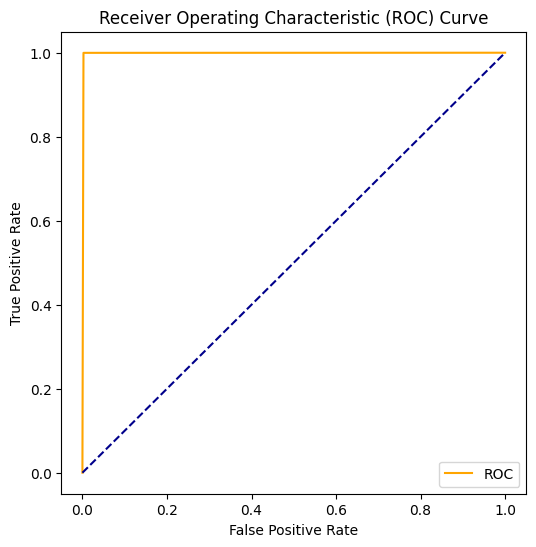

Confusion Matrix:
[[ 7537    19]
 [    4 13495]]
Accuracy: 0.9989
Precision: 0.9986
Recall: 0.9997
F1-Score: 0.9991


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Two
    Fully-Connected Neural Networks (TensorFlow)
    Activation Function: tanh
    Layers/Count: 64/32
    Optimizer: sgd

In [5]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=[train_data_preprocessed.shape[1]]),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 2s 2ms/step - loss: 0.1633 - accuracy: 0.9766 - val_loss: 0.0343 - val_accuracy: 0.9881
Epoch 2/50
 34/578 [>.............................] - ETA: 0s - loss: 0.0226 - accuracy: 0.9982

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9976 - val_loss: 0.0295 - val_accuracy: 0.9896
Epoch 3/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9982 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 4/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9982 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 5/50
578/578 [==============================] - 1s 2ms/step - loss: 0.1581 - accuracy: 0.9858 - val_loss: 0.0286 - val_accuracy: 0.9942
Epoch 6/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.0410 - val_accuracy: 0.9857
Epoch 7/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9844
Epoch 8/50
578/578 [==============================] - 1s 2ms/step - loss: 9.6712e-04 - accuracy: 1.0000 - val_loss: 0.0431 - val_accuracy: 0.9855
Epoch 9/50
57

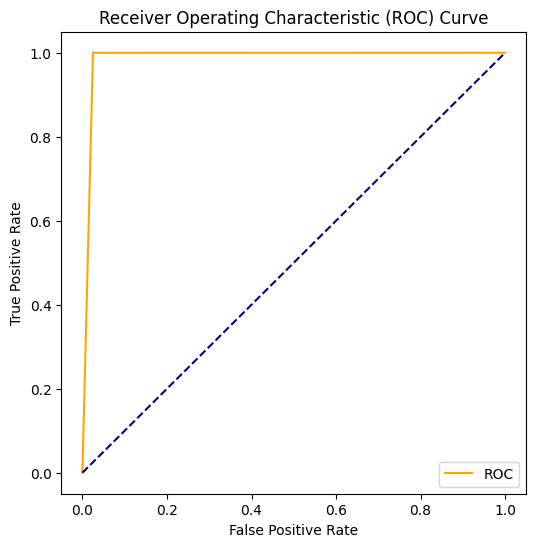

Confusion Matrix:
[[ 7367   189]
 [    1 13498]]
Accuracy: 0.9910
Precision: 0.9862
Recall: 0.9999
F1-Score: 0.9930


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Three
    Convolutional Neural Networks (TensorFlow)
    Activation Function: relu
    Layers/Count: 16
    Optimizer: adam

In [7]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(16, 3, activation='relu', input_shape=(train_data_preprocessed.shape[1],1)),
    tf.keras.layers.MaxPooling1D(1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 3s 5ms/step - loss: 0.0857 - accuracy: 0.9741 - val_loss: 0.0957 - val_accuracy: 0.9719
Epoch 2/50
 27/578 [>.............................] - ETA: 2s - loss: 0.1211 - accuracy: 0.9815

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 3s 5ms/step - loss: 0.0592 - accuracy: 0.9937 - val_loss: 0.0790 - val_accuracy: 0.9511
Epoch 3/50
578/578 [==============================] - 4s 7ms/step - loss: 0.0098 - accuracy: 0.9988 - val_loss: 0.0197 - val_accuracy: 0.9996
Epoch 4/50
578/578 [==============================] - 5s 9ms/step - loss: 0.0087 - accuracy: 0.9995 - val_loss: 0.0108 - val_accuracy: 0.9998
Epoch 5/50
578/578 [==============================] - 6s 10ms/step - loss: 0.0080 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 6/50
578/578 [==============================] - 3s 6ms/step - loss: 0.0076 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/50
578/578 [==============================] - 3s 5ms/step - loss: 0.0075 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 8/50
578/578 [==============================] - 3s 5ms/step - loss: 0.0075 - accuracy: 0.9995 - val_loss: 6.1609e-04 - val_accuracy: 1.0000
Epoch 9/50
5

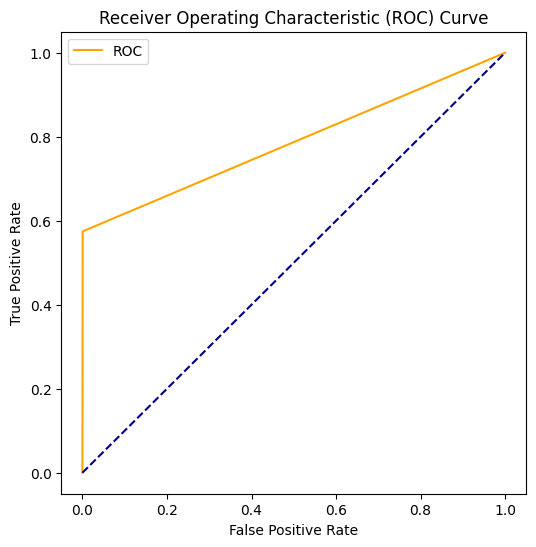

Confusion Matrix:
[[7551    5]
 [5742 7757]]
Accuracy: 0.7270
Precision: 0.9994
Recall: 0.5746
F1-Score: 0.7297


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Four
    Convolutional Neural Networks (TensorFlow)
    Activation Function: tanh
    Layers/Count: 16
    Optimizer: sgd

In [9]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(16, 3, activation='tanh', input_shape=(train_data_preprocessed.shape[1],1)),
    tf.keras.layers.MaxPooling1D(1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 3s 5ms/step - loss: 0.1792 - accuracy: 0.9624 - val_loss: 0.1012 - val_accuracy: 0.9356
Epoch 2/50
 27/578 [>.............................] - ETA: 2s - loss: 0.0438 - accuracy: 0.9954

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 3s 5ms/step - loss: 0.0152 - accuracy: 0.9983 - val_loss: 0.0726 - val_accuracy: 0.9591
Epoch 3/50
578/578 [==============================] - 3s 4ms/step - loss: 0.0060 - accuracy: 0.9998 - val_loss: 0.0702 - val_accuracy: 0.9598
Epoch 4/50
578/578 [==============================] - 3s 4ms/step - loss: 0.0037 - accuracy: 0.9999 - val_loss: 0.0720 - val_accuracy: 0.9572
Epoch 5/50
578/578 [==============================] - 3s 5ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 0.0610 - val_accuracy: 0.9658
Epoch 6/50
578/578 [==============================] - 3s 5ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.0613 - val_accuracy: 0.9669
Epoch 7/50
578/578 [==============================] - 3s 5ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0570 - val_accuracy: 0.9721
Epoch 8/50
578/578 [==============================] - 3s 5ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0557 - val_accuracy: 0.9738
Epoch 9/50
578/57

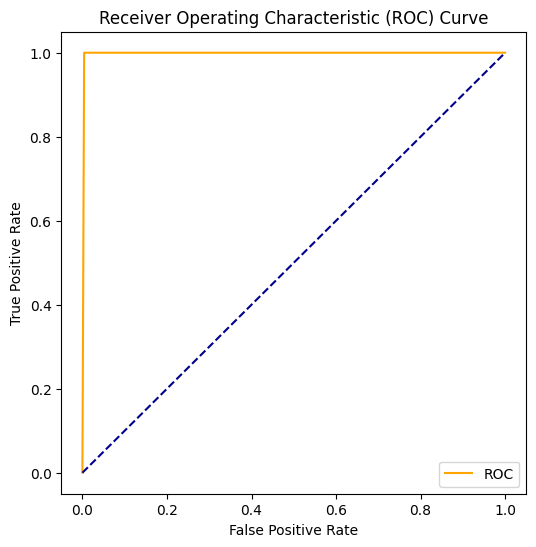

Confusion Matrix:
[[ 7525    31]
 [    0 13499]]
Accuracy: 0.9985
Precision: 0.9977
Recall: 1.0000
F1-Score: 0.9989


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Five
    Logistic Regression (scikit-learn)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = LogisticRegression()

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


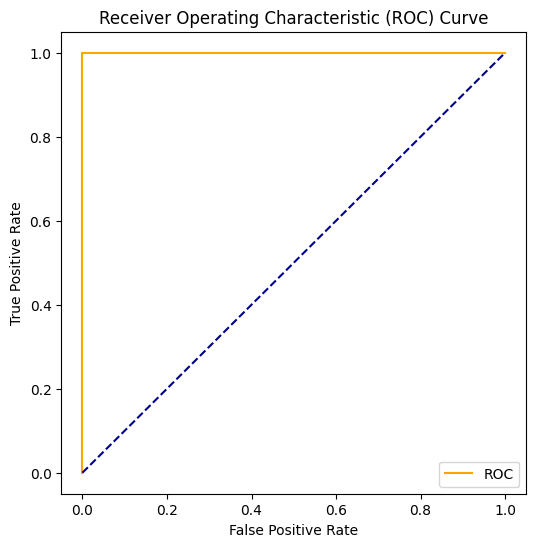

Confusion Matrix:
[[ 7556     0]
 [    0 13499]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Six
    Support Vector Machine (scikit-learn)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = SVC(kernel='linear')

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


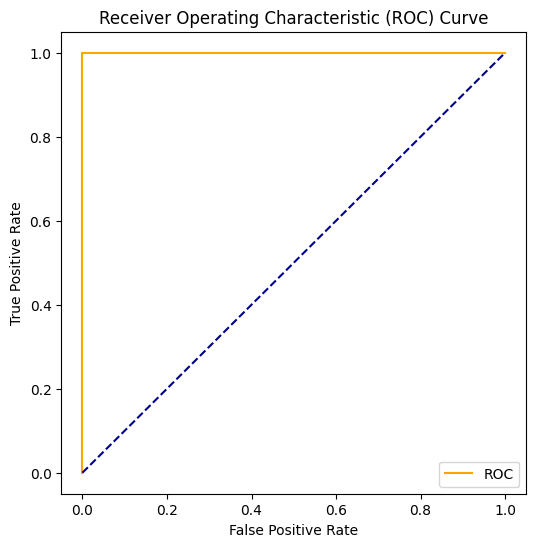

Confusion Matrix:
[[ 7556     0]
 [    0 13499]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

## Additional Requirement 1:

# A Multi-class classification problem

This process involves developing a multi-class classification model for intrusion detection, capable of identifying various attack types in a cybersecurity dataset. We used data cleaning, feature encoding, and a Random Forest Classifier, with evaluation metrics like confusion_matrix and classification_report for assessing model performance per attack type.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load datasets
train_data = pd.read_csv('cyber-data/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('cyber-data/UNSW_NB15_testing-set.csv')

# Drop any rows with missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Separate features and labels
X_train = train_data.drop(columns=['label', 'attack_cat'])
y_train = train_data['attack_cat']

X_test = test_data.drop(columns=['label', 'attack_cat'])
y_test = test_data['attack_cat']

# Encode labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Identify categorical and numerical features
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for handling categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Apply the preprocessor to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert to dense format
X_train_preprocessed = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, "toarray") else X_train_preprocessed
X_test_preprocessed = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, "toarray") else X_test_preprocessed

# Balance the dataset
smote = SMOTE(random_state=42)
X_train_preprocessed, y_train = smote.fit_resample(X_train_preprocessed, y_train)

# Create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = model.predict(X_test_preprocessed)

# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[  262   210    67    72    58     0     8     0     0     0]
 [  263   133    74    26    62     0    18     1     6     0]
 [  834  1621   459   611   158     0   314    49    42     1]
 [ 1028  1581   264  6758   309     0   731   277   178     6]
 [  580   352   152   176  2260     0  2184    43   314     1]
 [    7    26    77   423    37 18169   104     1    20     7]
 [ 1452     0    70   518  9492     2 25065    25   367     9]
 [   77   211    13   153    33     0   501  2417    91     0]
 [    0     0     0     7     5     0   148     1   217     0]
 [    0     0     0    27     2     0     4     0     1    10]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.06      0.39      0.10       677
      Backdoor       0.03      0.23      0.06       583
           DoS       0.39      0.11      0.17      4089
      Exploits       0.77      0.61      0.68     11132
       Fuzzers       0.18      0.37      0.24 

## Additional Requirement 2:

This code develops a multi-class classification model for intrusion detection using downsampling to balance the training dataset. It preprocesses features with a `ColumnTransformer`, uses `RandomUnderSampler` for balancing, trains a Random Forest model, and evaluates it with a confusion matrix and classification report.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load datasets
train_data = pd.read_csv('cyber-data/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('cyber-data/UNSW_NB15_testing-set.csv')

# Drop any rows with missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Separate features and labels
X_train = train_data.drop(columns=['label', 'attack_cat'])
y_train = train_data['attack_cat']

X_test = test_data.drop(columns=['label', 'attack_cat'])
y_test = test_data['attack_cat']

# Encode labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for handling categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Apply the preprocessor to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Balance the dataset using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_preprocessed, y_train = rus.fit_resample(X_train_preprocessed, y_train)

# Check balanced distribution
print("Balanced Class Distribution (Training):")
print(pd.Series(y_train).value_counts())

# Create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = model.predict(X_test_preprocessed)

# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Balanced Class Distribution (Training):
0    130
1    130
2    130
3    130
4    130
5    130
6    130
7    130
8    130
9    130
Name: count, dtype: int64
Confusion Matrix:
[[  168   279    55   136    34     0     3     1     1     0]
 [  166   203    63   117     5     4     5     5    11     4]
 [  240  2224   250   579    74     6   387    69   164    96]
 [  459  2159   580  5168   287     8  1098   327   460   586]
 [  336   553   120   282  2731     6  1305   130   403   196]
 [    7    40    49   283    70 18142   109    21    93    57]
 [ 2046    38    15   309 10095     0 22544   507  1285   161]
 [   10   276    12    63    11     4   195  2710   139    76]
 [    0     0     0     0     3     0    26    21   326     2]
 [    0     0     0     2     1     0     0     0     6    35]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.05      0.25      0.08       677
      Backdoor       0.04      0.35      0.06       583
  

## Additional Requirement 3:

# Feature importance analysis

This code demonstrates feature importance analysis using logistic regression, identifying the top-10 most important features. It then trains a Random Forest classifier on these features, evaluating its performance with a confusion matrix and classification report.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load datasets
train_data = pd.read_csv('cyber-data/UNSW_NB15_training-set.csv')
test_data = pd.read_csv('cyber-data/UNSW_NB15_testing-set.csv')

# Drop any rows with missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Separate features and labels
X_train = train_data.drop(columns=['label', 'attack_cat'])
y_train = train_data['attack_cat']

X_test = test_data.drop(columns=['label', 'attack_cat'])
y_test = test_data['attack_cat']

# Encode labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Column transformer for handling categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Apply the preprocessor to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Feature importance using Logistic Regression with increased iterations and an alternative solver
log_reg = LogisticRegression(random_state=42, max_iter=3000, solver='newton-cg')
log_reg.fit(X_train_preprocessed, y_train)

# Get feature coefficients
feature_importances = np.abs(log_reg.coef_[0])
top_features_idx = np.argsort(feature_importances)[-10:]

# Select only the top-10 features
X_train_top10 = X_train_preprocessed[:, top_features_idx]
X_test_top10 = X_test_preprocessed[:, top_features_idx]

# Create and train model using only the top-10 features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_top10, y_train)

# Predictions
y_pred = rf_model.predict(X_test_top10)

# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[    0     3    16   591    49     0    18     0     0     0]
 [    0     2    16   506    53     0     0     6     0     0]
 [    0    10    91  2882   955    23    14   114     0     0]
 [   18    11    77  8862  1893     7   100   164     0     0]
 [    0     5    43  2776  2563    17   201   457     0     0]
 [    0     0    50   319   188 18161    19   134     0     0]
 [   51     0     0  5751 10017     1 19714  1466     0     0]
 [    0     1     2   739  1485     7     1  1261     0     0]
 [    0     0     0     0   193     0     0   185     0     0]
 [    0     0     0    34     4     0     0     6     0     0]]

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.06      0.00      0.01       583
           DoS       0.31      0.02      0.04      4089
      Exploits       0.39      0.80      0.53     11132
       Fuzzers       0.15      0.42      0.22 

c:\Users\User\anaconda3\envs\AdibasEnv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\AdibasEnv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\AdibasEnv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
